In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_excel(r"dataset\Data pricing.xlsx")
df.head()

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Global Totals (2023),Unnamed: 12
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,24-07-2023,Total number of countries,237.000
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,25-07-2023,Most expensive 1GB,138.190
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,19-07-2023,Cheapest 1GB,0.001
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09 00:00:00,Average package price globally,0.460
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09 00:00:00,Total packages included in study,5603.000


Data Cleaning and preprocessing

In [5]:
df.shape

(237, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Continental region                         237 non-null    object 
 1   Plans measured                             237 non-null    int64  
 2   Average price of 1GB (local currency)      237 non-null    float64
 3   Currency                                   237 non-null    object 
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64
 5   Average price of 1GB (USD)                 237 non-null    float64
 6   Cheapest 1GB (Local currency)              237 non-null    float64
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64
 8   Most expensive 1GB (Local currency)        237 non-null    float64
 9   Most expensive 1GB (USD)                   237 non-null    float64
 10  Sample date               

In [7]:
#check for missing values
df.isnull().sum()

Continental region                             0
Plans measured                                 0
Average price of 1GB (local currency)          0
Currency                                       0
Conversion rate (USD) (Frozen 07/09/2023)      0
Average price of 1GB (USD)                     0
Cheapest 1GB (Local currency)                  0
Cheapest 1GB for 30 days (USD)                 0
Most expensive 1GB (Local currency)            0
Most expensive 1GB (USD)                       0
Sample date                                    0
Global Totals (2023)                         231
Unnamed: 12                                  231
dtype: int64

In [8]:
#Lets drop irrelevant columns
df = df.drop(columns=['Global Totals (2023)', 'Unnamed: 12'])

#Convert the sample data to datetime 
df['Sample date'] = pd.to_datetime(df['Sample date'], errors='coerce')

df.head()

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,2023-07-24
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,2023-07-25
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,2023-07-19
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09


#### Exploratory Data Analysis

In [9]:
df.describe()

,Plans measured,Average price of 1GB (local currency),Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237
mean,23.873418,782.758101,0.462019,2.589198,297.882549,1.026143,5291.942532,13.974304,2023-07-07 13:40:15.189873408
min,2.000000,0.080000,0.000020,0.020000,0.004000,0.001000,0.200000,0.200000,2023-01-08 00:00:00
25%,11.000000,2.080000,0.009100,0.630000,0.630000,0.160000,9.800000,2.890000,2023-06-08 00:00:00
50%,21.000000,7.320000,0.233490,1.280000,3.000000,0.370000,48.000000,6.900000,2023-07-20 00:00:00
75%,34.000000,83.330000,1.000000,2.500000,29.000000,0.900000,645.000000,16.070000,2023-08-08 00:00:00
max,60.000000,63333.330000,3.242020,43.750000,31142.860000,38.830000,450000.000000,138.190000,2023-12-07 00:00:00
std,15.677659,4364.202521,0.532678,5.179471,2149.872664,3.236073,31121.700343,19.916485,NaN


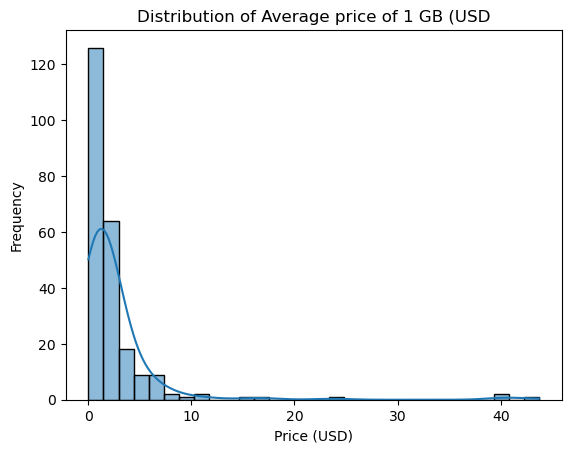

In [10]:
#Lets check the distribution of Internet pricing in USD
sns.histplot(df['Average price of 1GB (USD)'], bins=30, kde=True)
plt.title("Distribution of Average price of 1 GB (USD")
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

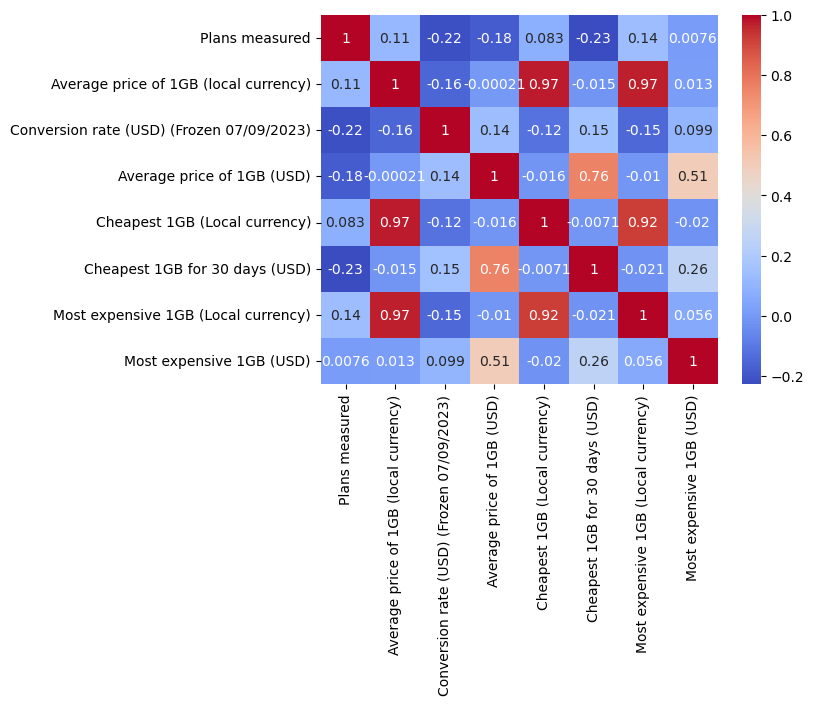

In [11]:
#Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

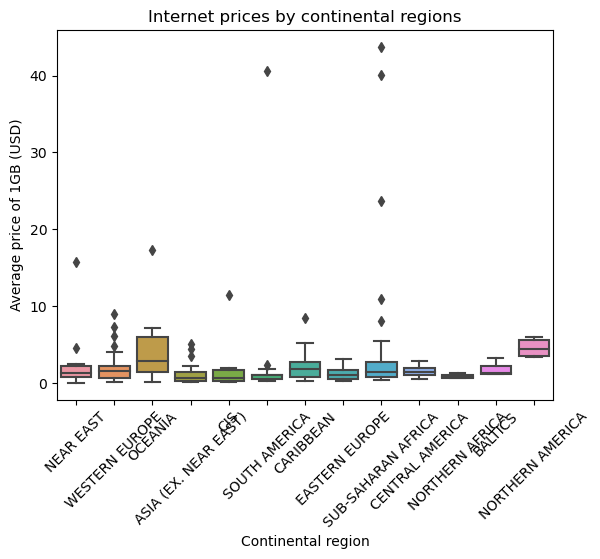

In [12]:
#Boxplot of internet prices by continental regions
sns.boxplot(x='Continental region', y='Average price of 1GB (USD)', data=df)
plt.title('Internet prices by continental regions')
plt.xticks(rotation=45)
plt.show()

The analysis revealed significant variations in internet pricing across different regions.

For future work, we could build predictive models to estimate internet pricing based on other socio-economic factors. Additionally, further analysis could be conducted to understand the impact of internet pricing on digital accessibility and economic development.

In [13]:
df.head()

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,2023-07-24
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,2023-07-25
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,2023-07-19
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Continental region                         237 non-null    object        
 1   Plans measured                             237 non-null    int64         
 2   Average price of 1GB (local currency)      237 non-null    float64       
 3   Currency                                   237 non-null    object        
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64       
 5   Average price of 1GB (USD)                 237 non-null    float64       
 6   Cheapest 1GB (Local currency)              237 non-null    float64       
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64       
 8   Most expensive 1GB (Local currency)        237 non-null    float64       
 9   Most expensive 1GB (U

In [18]:
# We need to convert continental region and currency to numeric values using one-hot encoder 
from sklearn.preprocessing import LabelEncoder, StandardScaler

#convert categorical data to numeric
le = LabelEncoder()
df['Continental region'] = le.fit_transform(df['Continental region'])
df['Currency'] = le.fit_transform(df['Currency'])

#Normalize numeric columns
scaler = StandardScaler()
numerical_columns = ['Conversion rate (USD) (Frozen 07/09/2023)', 'Cheapest 1GB (Local currency)','Most expensive 1GB (Local currency)']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


df.head()


,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
0,6,24,0.08,55,-0.380280,0.02,-0.138850,0.001,-0.170373,0.22,2023-07-24
1,12,33,0.08,40,1.146735,0.09,-0.138837,0.030,-0.170336,2.14,2023-07-25
2,9,17,0.20,41,-0.041424,0.09,-0.138805,0.040,-0.170368,0.44,2023-07-19
3,12,12,0.09,40,1.146735,0.10,-0.138833,0.040,-0.170336,2.14,2023-06-09
4,0,16,0.12,130,1.012092,0.12,-0.138805,0.100,-0.170394,0.20,2023-01-09


Identifying features are target columns 

Features:
    1. Continental region
    2. Conversion rate (USD)
    3. Cheapest 1GB (Local currency)
    4. Most expensive 1GB (Local currency)

Target:
    1. Average price of 1GB (USD)

In [19]:
X = df[['Continental region', 'Conversion rate (USD) (Frozen 07/09/2023)', 'Cheapest 1GB (Local currency)',
        'Most expensive 1GB (Local currency)']]

y = df['Average price of 1GB (USD)']


In [22]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training test size:", X_train.shape)
print("Test size:", X_test.shape)

Training test size: (189, 4)
Test size: (48, 4)


### Train a Regression Model

In [23]:
#Lets analyze the factors affecting the price 
from sklearn.linear_model import LinearRegression

#Train the model 
model = LinearRegression()
model.fit(X_train, y_train)

#Check the coefficients
print("Model coefficients:", model.coef_)
print("Model Interceptors:", model.intercept_)

Model coefficients: [ 0.1327279   0.20478381 -0.31566108  0.77792517]
Model Interceptors: 1.5502909906756108


In [25]:
#Lets evaluate the model now
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 61.39666126071518
R2 score: 0.010763110102395501


### Lets use RandomForest to check 

In [26]:
from sklearn.ensemble import RandomForestRegressor

#Train a random forest model 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#Evaluate
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R² Score:", rf_r2)

Random Forest - Mean Squared Error: 36.294856171874976
Random Forest - R² Score: 0.41520906998048956


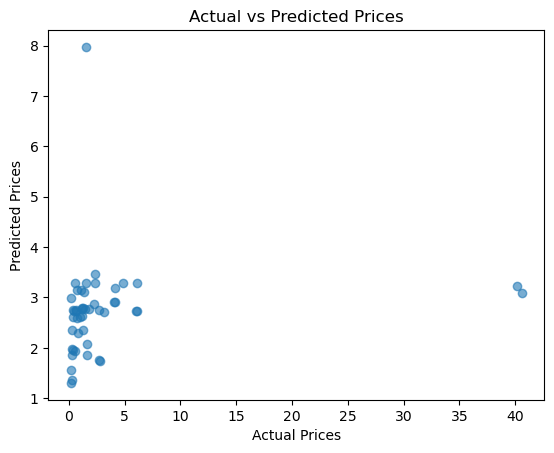

In [27]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [29]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.6/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.1/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 1.6/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.0/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 2.7/124.9 MB 7.1 MB/s eta 0:00:18
   - -----------------------------

In [30]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost - R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost - R² Score: 0.702483428218708
